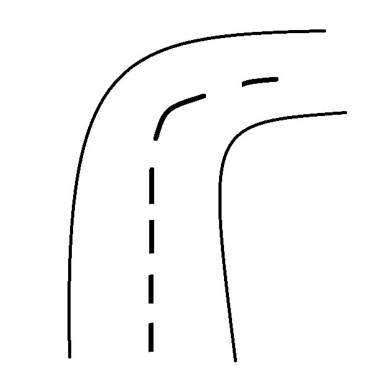

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('curve.jpg')
plt.imshow(image)
plt.axis('off') 
plt.show()


## Detecting the lines step by step by increasing the region of interest

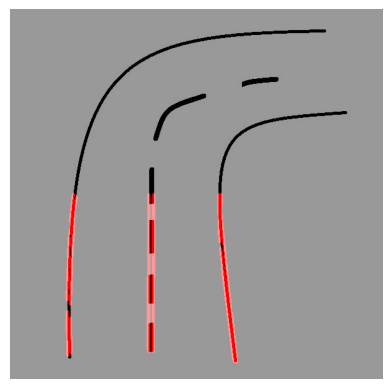

In [34]:
#BOTTOM HALF

def detect_lanes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    
    # region of interest (bottom half of the image)
    height, width = edges.shape
    mask = np.zeros_like(edges)
    roi_vertices = np.array([[(0, height // 2), (width, height // 2), (width, height), (0, height)]], dtype=np.int32)
    cv2.fillPoly(mask, roi_vertices, 255)
    # applying white mask
    masked_edges = cv2.bitwise_and(edges, mask)
    
    # Hough Transform probabilistic
    lines = cv2.HoughLinesP(masked_edges, rho=1, theta=np.pi/180, threshold=20, minLineLength=40, maxLineGap=70)
    
    # draw lines
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 4)
    
    result = cv2.addWeighted(image, 0.6, line_image, 1, 0)
    
    return result

# Assuming 'image' is your input image
result = detect_lanes(image)
plt.imshow(result)
plt.axis('off') 
plt.show()


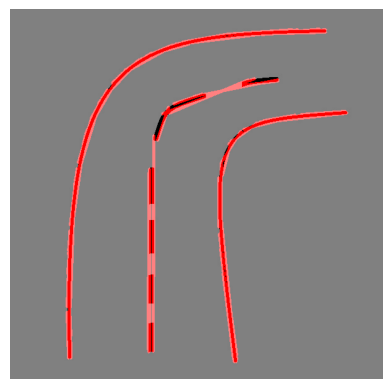

In [55]:
#COMPLETE IMAGE

def detect_lanes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    
    #region of interest
    height, width = edges.shape
    mask = np.zeros_like(edges)
    roi_vertices = np.array([[(0, 0), (width,0), (width, height), (0, height)]], dtype=np.int32)
    cv2.fillPoly(mask, roi_vertices, 255)
    #applying white mask
    masked_edges = cv2.bitwise_and(edges, mask)
    
    # hough Transform probabilistic
    lines = cv2.HoughLinesP(masked_edges, rho=1, theta=np.pi/180, threshold=20, minLineLength=40, maxLineGap=70)
    
    # draw lines
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 4)
    
    result = cv2.addWeighted(image,0.5, line_image, 1, 0)
    
    return result

result = detect_lanes(image)
plt.imshow(result)
plt.axis('off') 
plt.show()

### Line detection with full image as ROI and high minimum line length

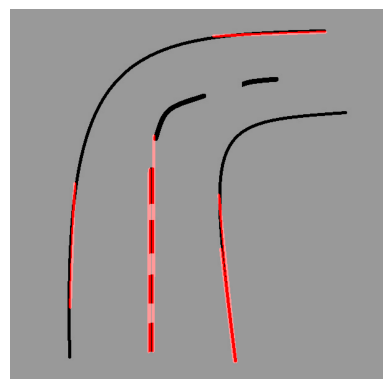

In [15]:
def detect_lanes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    
    #region of interest
    height, width = edges.shape
    mask = np.zeros_like(edges)
    roi_vertices = np.array([[(0, 0), (width, 0), (width, height), (0, height)]], dtype=np.int32)
    cv2.fillPoly(mask, roi_vertices, 255)
    #applying white mask
    masked_edges = cv2.bitwise_and(edges, mask)
    
    # hough Transform probabilistic
    lines = cv2.HoughLinesP(masked_edges, rho=1, theta=np.pi/180, threshold=20, minLineLength=180, maxLineGap=70)
    
    # draw lines
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 4)
    
    result = cv2.addWeighted(image,0.6, line_image, 1, 0)
    
    return result

result = detect_lanes(image)
plt.imshow(result)
plt.axis('off') 
plt.show()

### Line detection with full image as ROI and high line gap

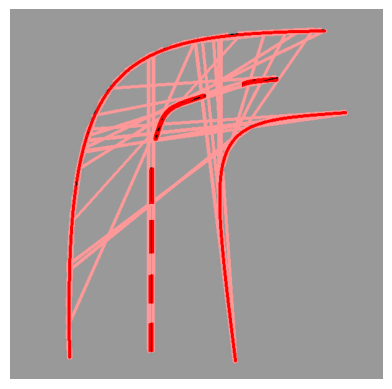

In [6]:
def detect_lanes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    
    #region of interest
    height, width = edges.shape
    mask = np.zeros_like(edges)
    roi_vertices = np.array([[(0, 0), (width, 0), (width, height), (0, height)]], dtype=np.int32)
    cv2.fillPoly(mask, roi_vertices, 255)
    #applying white mask
    masked_edges = cv2.bitwise_and(edges, mask)
    
    # hough Transform probabilistic
    lines = cv2.HoughLinesP(masked_edges, rho=1, theta=np.pi/180, threshold=20, minLineLength=40, maxLineGap=400)
    
    # draw lines
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 4)
    
    result = cv2.addWeighted(image,0.6, line_image, 1, 0)
    
    return result

result = detect_lanes(image)
plt.imshow(result)
plt.axis('off') 
plt.show()